<h2>Finding the Best Markets to Advertise In</h2>

The aim of this project is to assess different markets to find the most lucrative market(s) in which to invest advertising funds. Giving that the cost of conducting large scale surveys is prohibitive, I am going to use data prepared by freeCodeCamp in their annual survey from 2017 (<a href='https://github.com/freeCodeCamp/2017-new-coder-survey'> which is available in this GitHub repository</a>). The GitHub repository also contains a basic explanation of the survey questions.

In [354]:
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('survey_data.csv',low_memory=False)
data.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [69]:
job_interest = pd.DataFrame(data['JobRoleInterest'].dropna().str.split(','))
job_interest['len'] = job_interest['JobRoleInterest'].apply(lambda x: len(x))
job_interest = job_interest[job_interest['len']==1]
job_interest = pd.Series(job_interest['JobRoleInterest'])
job_interest = job_interest.apply(lambda x: str(x)).str.replace('[','').str.replace(']','').str.replace("'","").str.strip()

Full-Stack Web Developer      37.19
Front-End Web Developer       20.33
Data Scientist                 6.87
Back-End Web Developer         6.42
Mobile Developer               5.29
Game Developer                 5.15
Information Security           4.16
Product Manager                2.49
Data Engineer                  2.39
User Experience Designer       2.35
DevOps / SysAdmin              1.63
Quality Assurance Engineer     0.68
Name: JobRoleInterest, dtype: float64


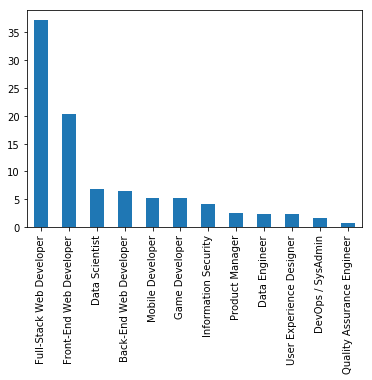

*The data in this chart represents 94.95 percent of the non-null data in the column.


In [120]:
job_vals = job_interest.value_counts(normalize=True)*100
job_vals = job_vals[job_vals.values>0.25]
job_vals = round(job_vals,2)
sum_percent = job_vals.sum()
job_vals.plot.bar()
pprint(job_vals)
plt.show()
print('*The data in this chart represents '+str(round(sum_percent,2))+' percent of the non-null data in the column.')

One of the issues with the dataset is that the 'JobRoleInterest' variable allows for user-inputted data and multiple selections per row, leaving the column with thousands of unique variables. I removed all null values and rows with multiple selections. I then filtered the Series, so only values with more than 0.25 of a percent were present in the data. As can be seen in the chart above, the remaining categories give a meaningful glimpse into the types of careers aspiring developers are interested in with a majority, approximately 37.19% wanting to become Full-Stack Web Developers, and 20.33% wanting to become Front-End Web Developers. Data Scientist occupies the tertiary spot with 6.87% of new developers planning on entering this profession, while Back-End Developer closely follows trails this value by only a fraction of a percent. Following that datum, the remaining values are rather small percentages -- all around 6% or smaller. Lastly, one can see from the note below the chart that, even with the filtering and exclusion of certain values, not much data was lost that affected the analysis in any significant fashion. Around 95% of the data was still included in the table and bar plot.

In [159]:
filtered_data = data[data['JobRoleInterest'].isnull()==False]
country_freq_abs = filtered_data['CountryLive'].value_counts()
country_freq_rel = filtered_data['CountryLive'].value_counts(normalize=True)*100
country_freq_table = pd.DataFrame({'count':country_freq_abs,'percent':country_freq_rel})
country_freq_table

,count,percent
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


A majority of the market is in the United States with India, England, and Canada following. However, the fact that a majority of survey-takers report living in the United States that does not mean they are willing to spend money on a development course.

In [392]:
filtered_data.loc[:,'MonthsProgramming'] = filtered_data.loc[:,'MonthsProgramming'].replace(to_replace=0,value=1)
filtered_data['money_per_mo'] = filtered_data['MoneyForLearning']/filtered_data['MonthsProgramming']
country_spending = filtered_data[['CountryLive','money_per_mo']].groupby(by='CountryLive').mean()
country_spending = country_spending.join(country_freq_abs)
country_spending = country_spending.sort_values(by='money_per_mo',ascending=False).dropna()
country_spending = country_spending.rename(columns={'money_per_mo':'money_per_mo','CountryLive':'count'})
country_spending = country_spending[country_spending['count']>10]
country_spending['total_spent'] = data[['CountryLive','MoneyForLearning']].groupby('CountryLive').sum()
country_spending['money_per_person_count'] = round(country_spending['money_per_mo']*country_spending['count'],2)
country_spending = country_spending.sort_values(ascending=False,by='money_per_person_count')
country_spending.head()

,money_per_mo,count,total_spent,money_per_person_count
CountryLive,,,,
United States of America,227.997996,3125,8429703.0,712493.74
India,135.100982,528,557858.0,71333.32
Spain,784.553084,77,355959.0,60410.59
Australia,419.268452,112,201564.0,46958.07
Canada,113.510961,260,839309.0,29512.85


What is relevant to this inquiry is making sure the return on investment justifies the costs of marketing. There is a risk latent in this inquiry that must be grappled with -- namely, do we want to market in a region where the consumers are willing to spend a lot of money despite their overall number being lower or do we want to target a region that has a greater number of customers despite the fact that they on average spend less? The table above shows a numerical breakdown of the relevant variables. The first column represents the average amount of money spent by the survey participants per month. The count column is the number of participants per country. The total_spent variable represents the overall spending for that region, while the money_per_person_count variable is the product of the first two columns. This last variable is meant to numerically-represent the potential revenue for each region, given that the number of people in a region is highly relevant and needs to be at the foreground of the analysis. The table below shows the same data ordered by count per country. The United States is by far the most overrepresented region in the sample with nearly six times as many survey participants than India, which is a far more populous country. These four countries in the table were the only countries with over 200 survey participants.

In [327]:
country_spending.tail(10)

,money_per_mo,count,total_spent,money_per_person_count
CountryLive,,,,
Bosnia & Herzegovina,19.807540,20,7105.0,396.15
Hungary,7.375000,34,6250.0,250.75
Japan,10.375541,24,10592.0,249.01
Republic of Serbia,14.652015,14,4800.0,205.13
Latvia,15.277778,13,1600.0,198.61
Egypt,6.658095,29,14405.0,193.08
Venezuela,11.923077,16,44421.0,190.77
Kazakhstan,16.105556,11,5743.0,177.16
Thailand,11.166314,13,5210.0,145.16


In [330]:
country_spending.sort_values(by='count',ascending=False).head(4)

,money_per_mo,count,total_spent,money_per_person_count
CountryLive,,,,
United States of America,227.997996,3125,8429703.0,712493.74
India,135.100982,528,557858.0,71333.32
United Kingdom,45.534443,315,334989.0,14343.35
Canada,113.510961,260,839309.0,29512.85


This table presents the same data as above, but sorted to show the countries with the most survey participants. These are the only four countries to have over 200 participants.

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


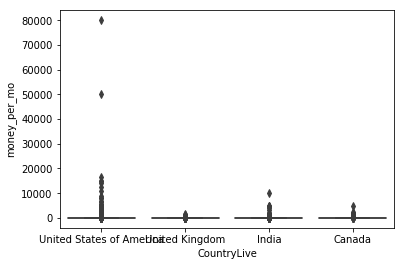

In [352]:
top_4 = filtered_data[filtered_data['CountryLive'].isnull()==False]
top_4 = top_4[top_4['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(x='CountryLive',y='money_per_mo',data=top_4)


The boxplot above shows why the money spent per month variable varies so much amongst the countries with the greatest number of survey participants. The United States has several outliers who spent an extreme amount of money skewing the mean of the distribution. India also has some outliers that raises the mean amount of money spent per customer above the surprisingly small mean amounts of both Canada and the United Kingdom, which would be expected to be higher given the higher GDPs for both countries. The outliers are most likely erroneous values wrongfully inputted by the survey takers and will be removed from the dataset to get a more accurate presentation of the data.

In [380]:
filter_df = top_4['money_per_mo'].quantile(0.99)
top_4_no_ol = top_4[top_4['money_per_mo']<filter_df]

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


['US', 'UK', 'India', 'Canada']

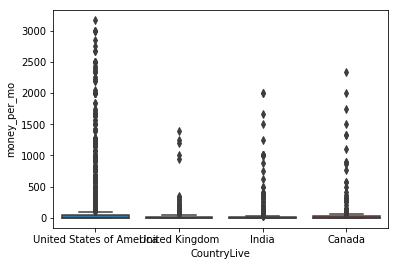

In [383]:
sns.boxplot(x='CountryLive',y='money_per_mo',data=top_4_no_ol)

Above is the revised boxplot, which shows the same data with the extreme outliers from the United States removed. I used the 99th quantile as a cutoff to set an upper threshold for which data were allowable. This didn't remove all outliers from the dataset. In fact, the boxplot shows more outliers as the reduced range of the graph makes it more granular exposing the outliers from all the countries. The United States still contains the most, but spending $3000 on programming courses/tutorials isn't wholly unrealistic. Therefore, the remaining outliers will be left in the data.

In [418]:
top_4_table = top_4_no_ol[['CountryLive','money_per_mo']].groupby('CountryLive').mean()
top_4_table.sort_values(by='money_per_mo',ascending=False)

,money_per_mo
CountryLive,
United States of America,111.571701
Canada,93.065400
India,65.758763
United Kingdom,45.534443


After removing outliers it becomes clearer which two markets are the most advantageous when it comes to the marketing campaign - the United States and Canada. Both of these countries have a lot of new developers who are willing to spend money.